# Library

In [1]:
import torch
import torchvision.transforms as T
from PIL import Image
from model.glow import Glow64x64V0, Glow256x256V0

In [2]:
ptt = T.ToTensor()
ttp = T.ToPILImage()

# Model

In [3]:
def load_glow_64x64_imagenet():
    ckpt_path = '/home/dajinhan/nas_dajinhan/experiments/glow/result/glow_64x64_imagenet.ckpt'
    pretrained = {'ckpt_path': ckpt_path}
    net = Glow64x64V0(pretrained)
    return net

def load_glow_64x64_celeba():
    ckpt_path = '/home/dajinhan/nas_dajinhan/experiments/glow/result/glow_64x64_celeba.ckpt'
    pretrained = {'ckpt_path': ckpt_path}
    net = Glow64x64V0(pretrained)
    return net

def load_glow_256x256_celeba():
    ckpt_path = '/home/dajinhan/nas_dajinhan/experiments/glow/result/glow_256x256_celeba.ckpt'
    pretrained = {'ckpt_path': ckpt_path}
    net = Glow256x256V0(pretrained)
    return net

# Sample

In [4]:
norm_mean = [0.5, 0.5, 0.5]
norm_std = [1.0, 1.0, 1.0]

preprocess = T.Normalize(
    mean=norm_mean, 
    std=norm_std)
reverse_preprocess = T.Normalize(
    mean=[-m/s for m,s in zip(norm_mean, norm_std)],
    std=[1/s for s in norm_std])

In [5]:
def x_to_z(net, x):
    x = preprocess(x)
    conditions = [None] * len(net.blocks)
    z_final, _, _, z_splits = net.forward(x, conditions)
    return z_final, z_splits

def z_to_x(net, z_final, z_splits):
    conditions = [None] * len(self.blocks)
    x = net.reverse(z_final, conditions, z_splits)
    x = reverse_preprocess(x)
    return x

def sample_64(net, n_samples=1, temp=0.7):
    z_final = temp * torch.randn((n_samples,96,4,4)) * net.final_temp
    z_splits = [
        temp * torch.randn((n_samples,6,32,32)) * net.inter_temp,
        temp * torch.randn((n_samples,12,16,16)) * net.inter_temp,
        temp * torch.randn((n_samples,24,8,8)) * net.inter_temp,
        None,
    ]
    conditions = [None] * len(net.blocks)
    x_sample = net.reverse(z_final, conditions, z_splits)
    x_sample = reverse_preprocess(x_sample)
    return x_sample

def sample_256(net, n_samples=1, temp=0.7):
    z_final = temp * torch.randn((n_samples,384,4,4)) * net.final_temp
    z_splits = [
        temp * torch.randn((n_samples,6,128,128)) * net.inter_temp,
        temp * torch.randn((n_samples,12,64,64)) * net.inter_temp,
        temp * torch.randn((n_samples,24,32,32)) * net.inter_temp,
        temp * torch.randn((n_samples,48,16,16)) * net.inter_temp,
        temp * torch.randn((n_samples,96,8,8)) * net.inter_temp,
        None,
    ]
    conditions = [None] * len(net.blocks)
    x_sample = net.reverse(z_final, conditions, z_splits)
    x_sample = reverse_preprocess(x_sample)
    return x_sample

### Glow_64x64_imagenet

In [6]:
net = load_glow_64x64_imagenet()

/home/dajinhan/nas_dajinhan/workspace/glow-pytorch/src/model/common/flow_module/flow.py:119: UserWarning: The given NumPy array is not writable, and PyTorch does not support non-writable tensors. This means writing to this tensor will result in undefined behavior. You may want to copy the array to protect its data or make it writable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /opt/conda/conda-bld/pytorch_1646755903507/work/torch/csrc/utils/tensor_numpy.cpp:178.)
  w_s = torch.from_numpy(w_s)


Load flownet - Checkpoint :  /home/dajinhan/nas_dajinhan/experiments/glow/result/glow_64x64_imagenet.ckpt


In [7]:
x = sample_64(net, n_samples=10, temp=0.7)

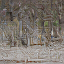

In [8]:
ttp(x[0])

### Glow_64x64_celeba

In [9]:
net = load_glow_64x64_celeba()

Load flownet - Checkpoint :  /home/dajinhan/nas_dajinhan/experiments/glow/result/glow_64x64_celeba.ckpt


In [10]:
x = sample_64(net, n_samples=10, temp=0.7)

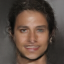

In [11]:
ttp(x[0])

### Glow_256x256_celeba

In [12]:
net = load_glow_256x256_celeba()

Load flownet - Checkpoint :  /home/dajinhan/nas_dajinhan/experiments/glow/result/glow_256x256_celeba.ckpt


In [19]:
x = sample_256(net, n_samples=10, temp=0.7)

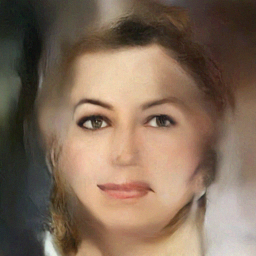

In [20]:
ttp(x[0])